<p align="center">
  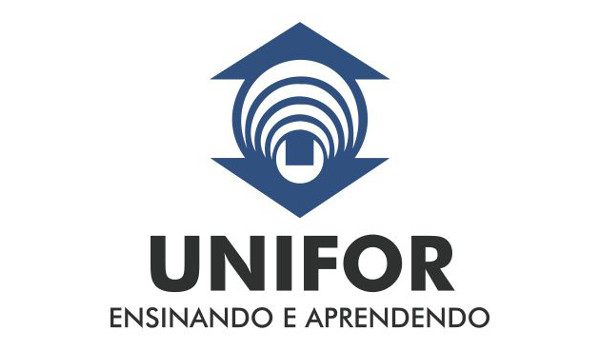</p>
<h1 style='text-align: center;'>UNIFOR - Universidade de Fortaleza</h1>
<h2 style='text-align: center;'>MBA EM CIÊCIA DE DADOS </h2>
<br><br>
<h4 style='text-align: center;'>JOSÉ VALCLEMIR RODRIGUES DA SILVA</h4>
<br><br>
<h4 style='text-align: center;'>Fortaleza-Ceará</h4>



In [131]:
library(ggplot2)
library(data.table)
library(dplyr)
library(ggcorrplot)
library(ggmap)
library(leaflet)
library(leaflet.extras)
library(readxl)
library(htmlwidgets)
#library(hrbrthemes)

In [132]:
df_caso_full <- read.csv(file = 'caso_full.csv')

#Converte factor to date 
newDates <- as.Date(df_caso_full$date, format= "%Y-%m-%d")
df_caso_full <- mutate(df_caso_full, date= newDates)

In [133]:
#Vizualiza dados
df_caso_full[1, ]

city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths
SÃ£o Paulo,3550308,2020-02-25,12252023,False,False,1,0.00816,2020-02-25,NA,0,city,SP,0,0


In [134]:
#Extrai ano e mes e anexa como uma nova coluna no dataframe 
df_caso_full['ano_mes'] <- format(as.Date(df_caso_full$date, format="%d/%m/%Y"),"%Y-%m")

In [135]:
#Filtra os óbitos  
obitos_gerais <- (df_caso_full[df_caso_full[['new_deaths']] == 1, ])

obitos_gerais_de_covid_por_dia <- setNames(
                                aggregate(x=obitos_gerais$new_deaths, 
                                by=list(Category=obitos_gerais$date), 
                                FUN=sum), c('dias', 'mortes_por_covid19'))


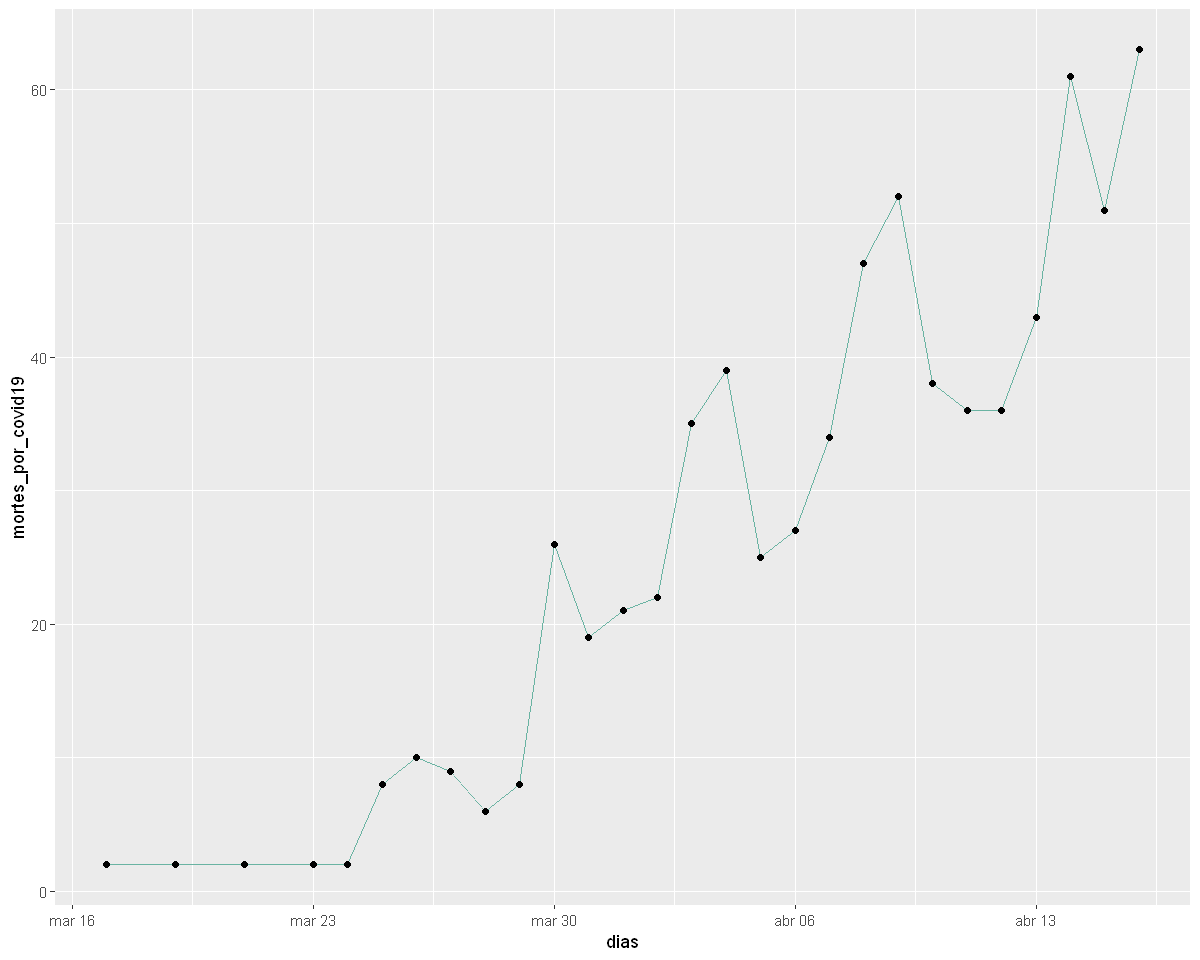

In [136]:
# Basic line plot with points
ggplot(data=obitos_gerais_de_covid_por_dia, aes(x=dias, y=mortes_por_covid19, group=1)) +
  geom_line(color="#69b3a2")+
  geom_point()

In [137]:
#Filtrando por datas 
data_inicial <- as.Date('2020-05-01')
data_final <- as.Date('2020-05-25')

dim(subset(df_caso_full,df_caso_full$date >= data_inicial & df_caso_full$date <= data_final))

[1]  0 16

In [138]:


sum_obtos_gerais_por_covid <- setNames(
                                aggregate(x=obitos_gerais$new_deaths, 
                                by=list(Category=obitos_gerais$state), 
                                FUN=sum), c('uf', 'quantidade'))




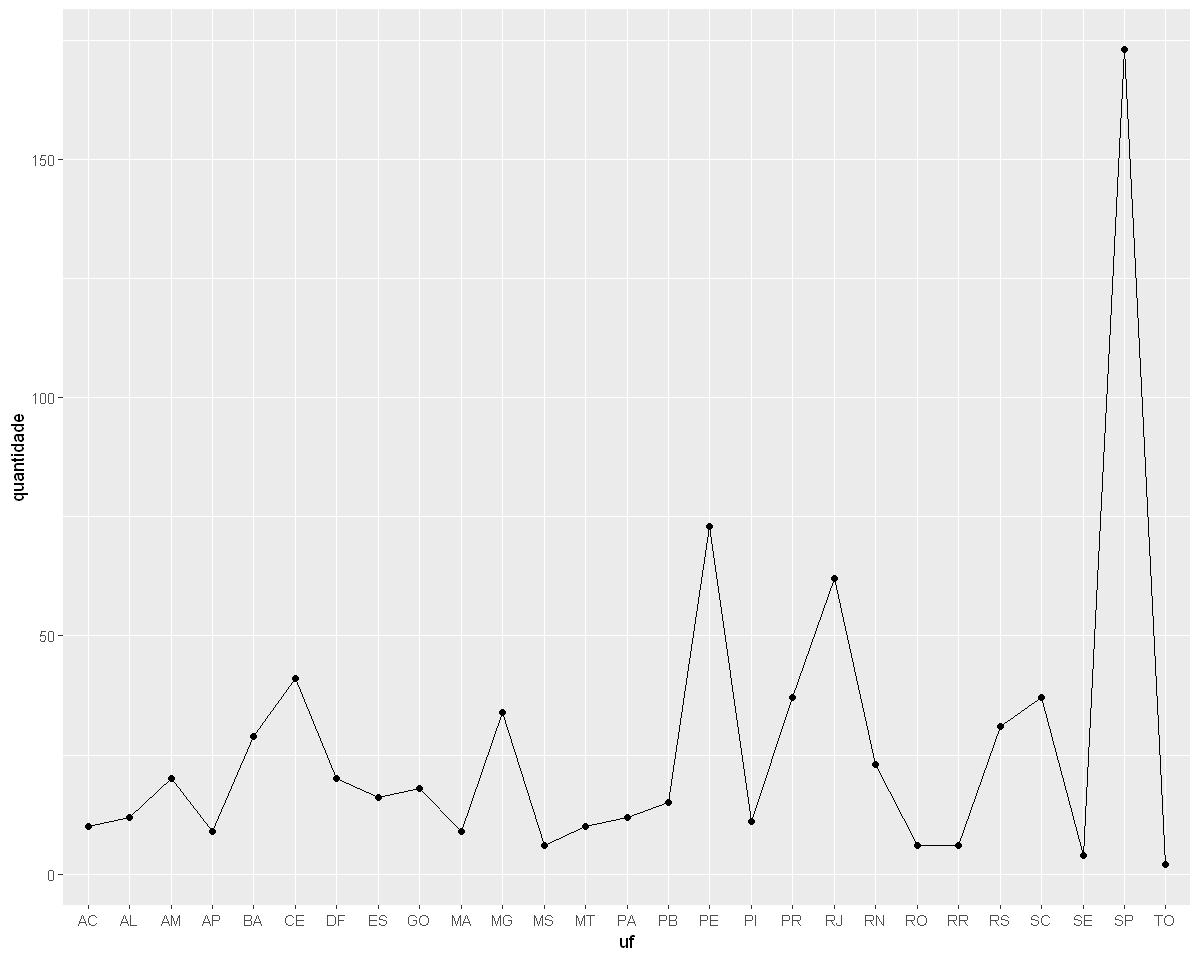

In [139]:
# Basic line plot with points
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(data=sum_obtos_gerais_por_covid, aes(x=uf, y=quantidade, group=1)) +
  geom_line()+
  geom_point()


In [140]:
df_obito_cartorio <- read.csv(file = 'obito_cartorio.csv')

#Converte factor to date 
newDates <- as.Date(df_obito_cartorio$date, format= "%Y-%m-%d")
df_obito_cartorio <- mutate(df_obito_cartorio, date= newDates)

df_obito_cartorio['ano_mes'] <- format(as.Date(df_obito_cartorio$date, format="%d/%m/%Y"),"%Y-%m")

In [141]:
df_obito_cartorio

date,state,new_deaths_pneumonia_2019,new_deaths_pneumonia_2020,new_deaths_respiratory_failure_2019,new_deaths_respiratory_failure_2020,new_deaths_covid19,epidemiological_week_2019,epidemiological_week_2020,deaths_covid19,deaths_respiratory_failure_2019,deaths_respiratory_failure_2020,deaths_pneumonia_2019,deaths_pneumonia_2020,ano_mes
2020-01-01,AC,3,0,3,0,0,1,1,0,3,0,3,0,2020-01
2020-01-01,AL,7,0,12,0,0,1,1,0,12,0,7,0,2020-01
2020-01-01,AM,2,0,0,0,0,1,1,0,0,0,2,0,2020-01
2020-01-01,AP,0,0,0,0,0,1,1,0,0,0,0,0,2020-01
2020-01-01,BA,10,0,31,0,0,1,1,0,31,0,10,0,2020-01
2020-01-01,CE,12,0,9,0,0,1,1,0,9,0,12,0,2020-01
2020-01-01,DF,10,0,2,0,0,1,1,0,2,0,10,0,2020-01
2020-01-01,ES,17,0,15,0,0,1,1,0,15,0,17,0,2020-01
2020-01-01,GO,16,0,14,0,0,1,1,0,14,0,16,0,2020-01
2020-01-01,MA,6,0,10,0,0,1,1,0,10,0,6,0,2020-01


In [142]:
sum_mortes_por_estado <- df_obito_cartorio[, c('state', 'deaths_covid19')][df_obito_cartorio[['deaths_covid19']] == 1, ]


aggregate(sum_mortes_por_estado$deaths_covid19, 
          by=list(Category=sum_mortes_por_estado$state), 
          FUN=sum)


Category,x
AC,11
AL,7
AM,2
BA,8
CE,1
DF,2
MS,6
MT,15
PA,2
PB,1


In [143]:
df1 = df_obito_cartorio[, c("date", "deaths_covid19")]#[which(df_obito_cartorio$state == 'CE'), ]
df2 = df_caso_full[, c("date", "new_deaths")]#[which(df_caso_full$state == 'CE'), ]

#df_obito_cartorio[, c("date", "deaths_covid19")][which(df_obito_cartorio$state == 'CE'), ]

In [144]:
sum_acumulado_obitos_cartorio <- setnames(aggregate(df1$deaths_covid19, 
                                      by=list(Category=df1$date), 
                                  FUN=sum), c("date", "cartorio"))

sum_acumulado_obitos_oficiais <- setnames(aggregate(df2$new_deaths, 
                                      by=list(Category=df2$date), 
                                  FUN=sum), c("date","oficiais"))


df_final = merge(sum_acumulado_obitos_cartorio, sum_acumulado_obitos_oficiais, by = "date")
long <- reshape2::melt(df_final, id.vars = "date")

#renomeia colunas
long <- setnames(long, c("date", "obitos", "value"))

Warning message:
"Transformation introduced infinite values in continuous y-axis"

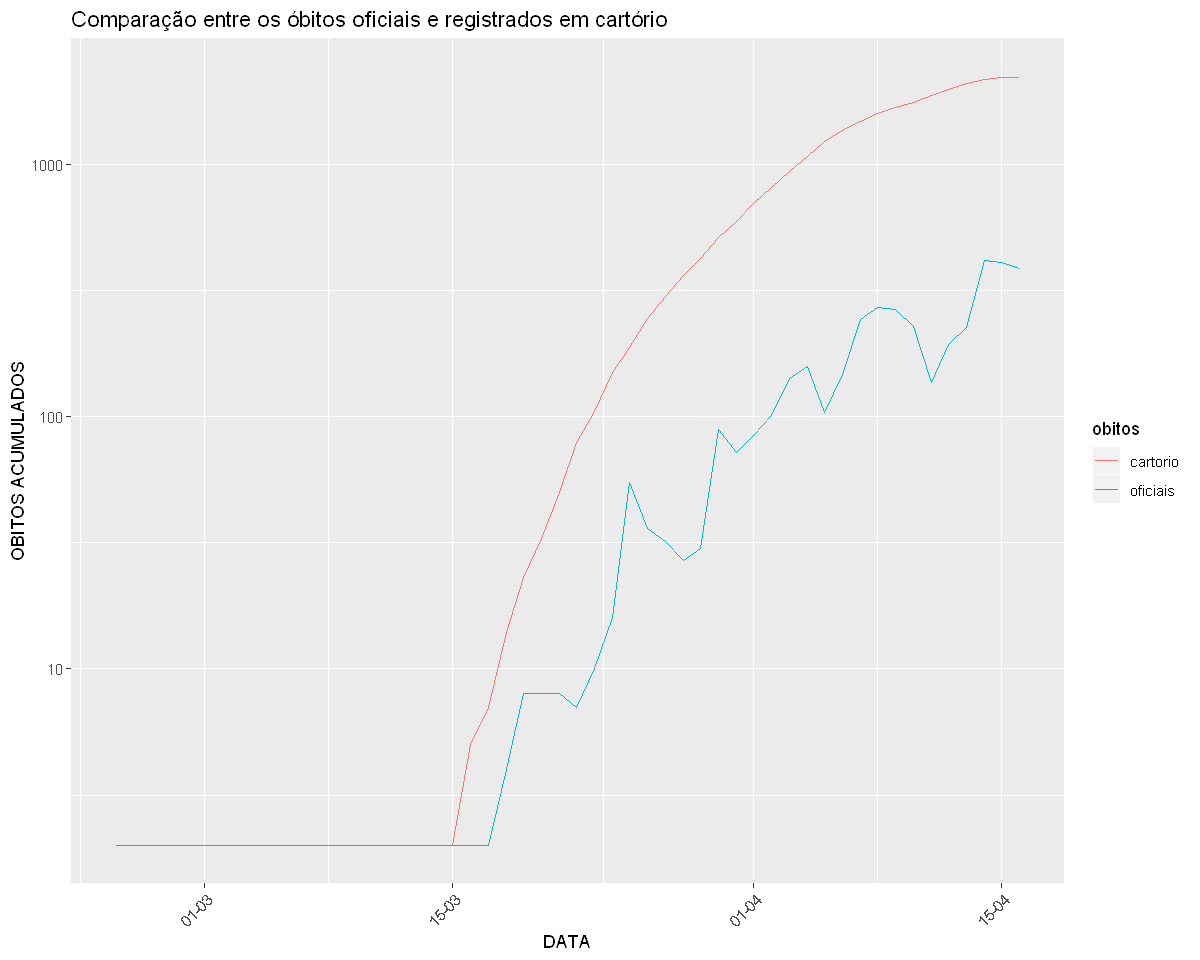

In [145]:
plot <- ggplot(long, aes(x =(date), y = value, 
                 group = obitos, colour = obitos)) +
  geom_line() +
  scale_y_log10(oob = scales::squish_infinite) +
  labs(title = "Comparação entre os óbitos oficiais e registrados em cartório",
       x = "DATA", y = "OBITOS ACUMULADOS")
plot + scale_x_date(date_labels = "%d-%m") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

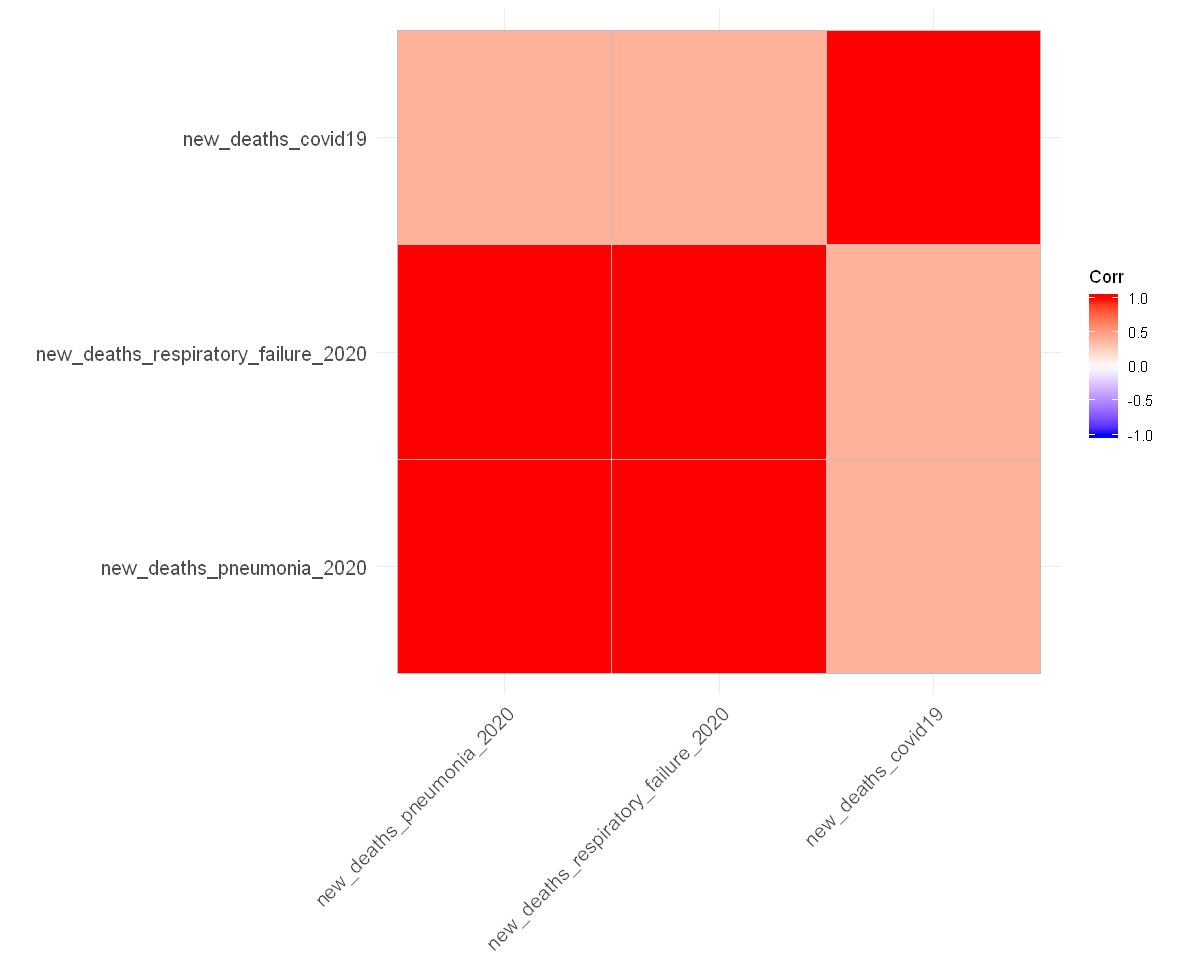

In [146]:
#Cria matriz de correlação 
corr <- round(cor(df_obito_cartorio[, c("new_deaths_pneumonia_2020", 
                                        "new_deaths_respiratory_failure_2020", 
                                        "new_deaths_covid19")]), 1)

#plota a correlação
ggcorrplot(corr)

Warning message:
"Removed 136 rows containing missing values (geom_path)."

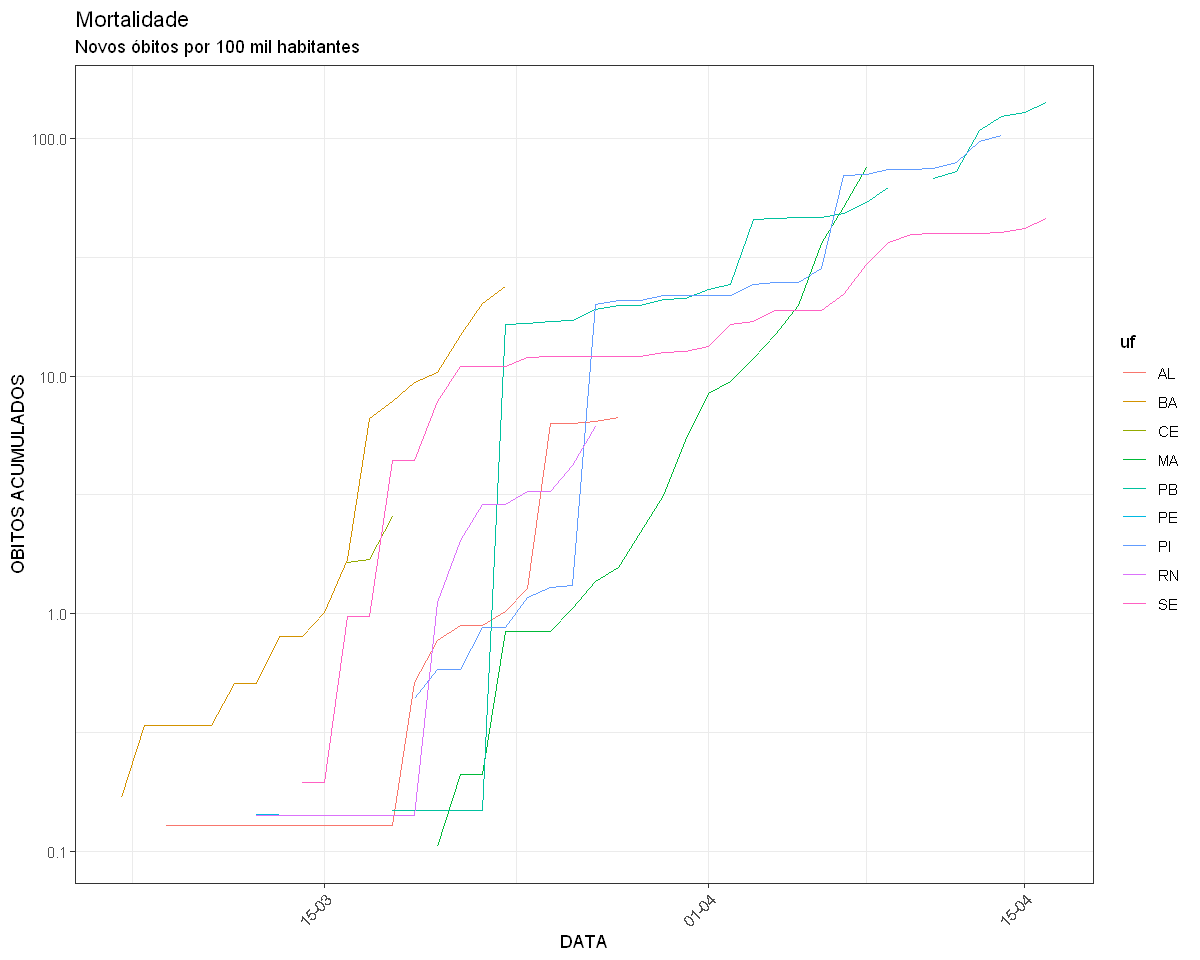

In [147]:
df_100k_hab = df_caso_full[, c("date", 
                               "last_available_confirmed_per_100k_inhabitants", 
                               "state")][which(df_caso_full$state %in% c('AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE')), ]

sum_acumulado_100k_hab <- (aggregate(df_100k_hab$last_available_confirmed_per_100k_inhabitants, 
                                      by=list(date=df_100k_hab$date, uf=df_100k_hab$state), 
                                  FUN=sum))



plot <- ggplot(sum_acumulado_100k_hab, aes(x =(date), y = x, 
                 group = uf, colour = uf)) +
  geom_line() +
  scale_y_log10(oob = scales::squish_infinite) +
  #theme_ipsum() +
  theme_bw() + 
  labs(title = "Mortalidade",
       subtitle = "Novos óbitos por 100 mil habitantes", 
       x = "DATA", y = "OBITOS ACUMULADOS")
plot + scale_x_date(date_labels = "%d-%m") + theme(axis.text.x = element_text(angle = 45, hjust = 1))



In [148]:
# Busca todos os casos de covid que levaram ao óbito
df_municipios <- read.csv("municipios_lat_long.csv")
df_muni_geo_ref <- df_municipios[ df_municipios$codigo_ibge %in% c(df_caso_full$city_ibge_code[df_caso_full$new_deaths == 1]), ]
#Mostra shape do dataset
dim(df_muni_geo_ref)


[1] 321   6

<h2> Plota mapas de clusterição de casos de obito nos estados </h2>
<h5 style="color:red"> Obs: Ao exportar para PDF, vai da problema para visualizar, pois a library que estou utilizando, utiliza javascript.
Enviarei o pdf e os dois mapas no formato html, com os seguintes nomes:</h5>
<ul>
<li>Mapa 1: mapa_cluste_obitos_nos_estados.html </li>
<li>Mapa 2: heat_map_municipios_obitos_por_covid.html </li>
</ul>

In [149]:
#Plota a clusterização de todos os casos de óbito nos estados
m1 <- leaflet(df_muni_geo_ref) %>% addTiles() %>% addMarkers(
  clusterOptions = markerClusterOptions()
)
m1
#Salva o mapa na pasta local para visualizacao
saveWidget(m1, 'mapa_cluste_obitos_nos_estados.html', selfcontained = FALSE)

Assuming "longitude" and "latitude" are longitude and latitude, respectively


HTML widgets cannot be represented in plain text (need html)

In [150]:
#plota mapa de calor de todos os municipios onde houveram obítos por covid
m2 <- leaflet(df_muni_geo_ref) %>%
  addTiles() %>%
  addHeatmap(lng = ~longitude, lat = ~latitude,  radius = 8)

#Salva o mapa na pasta local visualizacao
saveWidget(m2, 'heat_map_municipios_obitos_por_covid.html', selfcontained = FALSE)
m2




HTML widgets cannot be represented in plain text (need html)

### Regressão linear para medir a correlação entre NOVOS CASOS CONFIRMADOS X IDHM

#### Carrega planilha de IDH

In [151]:
df_idh <- read_excel("idh.xlsx")

#### Visualiza os dados 

In [152]:
head(df_idh)

city,Código [-],Gentílico [-],Prefeito [2021],Área Territorial - km² [2019],População estimada - pessoas [2019],Densidade demográfica - hab/km² [2010],Escolarização <span>6 a 14 anos</span> - % [2010],IDHM,Mortalidade infantil - óbitos por mil nascidos vivos [2017],Receitas realizadas - R$ (×1000) [2015],Despesas empenhadas - R$ (×1000) [2013],PIB per capita - R$ [2017]
Abaiara,2300101,abaiarense,AFONSO TAVARES LEITE,180.833,11737,58.69,96.7,0.286,33.33,28986.22,20359.02,8009.54
Acarape,2300150,acarapense,FRANCISCO EDILBERTO BESERRA BARROSO,130.002,14929,98.52,96.8,0.349,14.56,32881.18,24460.01,9071.54
Acaraú,2300200,acarauense,ANA FLÁVIA RIBEIRO MONTEIRO,842.471,62641,68.31,96.8,0.277,8.81,55723.51,86866.98,10194.05
Acopiara,2300309,acopiarense,ANTÔNIO ALMEIDA NETO,2254.279,54270,22.58,97.2,0.254,19.54,93726.44,70523.30,7405.88
Aiuaba,2300408,aiuabense,RAMILSON ARAUJO MORAES,2438.563,17399,6.66,97.5,0.256,10.87,33372.70,27995.55,6087.48
Alcântaras,2300507,alcantarense,JOAQUIM FREIRE CARVALHO,135.760,11714,77.71,97.7,0.285,25.42,26602.08,20660.45,6046.26


#### Filtra apenas o estado do CEARA

In [153]:
#df_muni_ce <- df_caso_full[ (df_caso_full['new_deaths'] == 1 & df_caso_full['state'] == 'CE'), ]
df_muni_ce <- df_caso_full[ (df_caso_full['state'] == 'CE'), ]

#### Subistitui caractéres unicode 

In [154]:
levels(df_muni_ce$city)[levels(df_muni_ce$city)=="Santa QuitÃ©ria"] <- "Santa Quitéria"
levels(df_muni_ce$city)[levels(df_muni_ce$city)=="EusÃ©bio"] <- "Eusébio"
levels(df_muni_ce$city)[levels(df_muni_ce$city)=="TianguÃ¡"] <- "Tianguá"
levels(df_muni_ce$city)[levels(df_muni_ce$city)=="CariÃºs"] <- "Cariús"
levels(df_muni_ce$city)[levels(df_muni_ce$city)=="MaracanaÃº"] <- "Maracanaú"


#### Seleciona as colunas CIDADE e IDHM e logo em seguida, guarda em numa variável

In [155]:
df_idh_muni <- df_idh[, c('city', 'IDHM')]
d <- merge(df_muni_ce, df_idh_muni, by="city")

#### Dropa os NA's 

In [156]:
d <- d[!rowSums(is.na(d[, c("last_available_confirmed_per_100k_inhabitants", "last_available_death_rate") ])), ]

In [157]:
d

,city,city_ibge_code,date,estimated_population_2019,is_repeated,is_last,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,place_type,state,new_confirmed,new_deaths,ano_mes,IDHM
48,Aracati,2301109,2020-04-08,74547,False,False,2,2.68287,2020-04-08,0.5000,1,city,CE,0,0,2020-04,0.371
50,Aracati,2301109,2020-04-16,74547,False,True,2,2.68287,2020-04-16,0.5000,1,city,CE,-1,0,2020-04,0.371
51,Aracati,2301109,2020-04-11,74547,False,False,2,2.68287,2020-04-11,0.5000,1,city,CE,0,0,2020-04,0.371
52,Aracati,2301109,2020-04-13,74547,False,False,3,4.02431,2020-04-13,0.3333,1,city,CE,1,0,2020-04,0.371
53,Aracati,2301109,2020-04-15,74547,False,False,3,4.02431,2020-04-15,0.3333,1,city,CE,0,0,2020-04,0.371
54,Aracati,2301109,2020-04-12,74547,False,False,2,2.68287,2020-04-12,0.5000,1,city,CE,0,0,2020-04,0.371
56,Aracati,2301109,2020-04-10,74547,False,False,2,2.68287,2020-04-10,0.5000,1,city,CE,0,0,2020-04,0.371
57,Aracati,2301109,2020-04-14,74547,False,False,3,4.02431,2020-04-14,0.3333,1,city,CE,0,0,2020-04,0.371
58,Aracati,2301109,2020-04-09,74547,False,False,2,2.68287,2020-04-09,0.5000,1,city,CE,0,0,2020-04,0.371
59,Aracati,2301109,2020-04-07,74547,False,False,2,2.68287,2020-04-07,0.5000,1,city,CE,1,1,2020-04,0.371


In [158]:
novos_casos <- d$new_confirmed # Variável resposta
idhm <- d$IDHM       # Variável explicativa
dados <- data.frame(novos_casos,idhm)

modelo.regressao <- lm(novos_casos ~ idhm, data= dados)
summary(modelo.regressao)  # Estimativa dos parâmetros, Erro, R2 do modelo


Call:
lm(formula = novos_casos ~ idhm, data = dados)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.996 -12.017  -6.552   5.939 132.004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -86.090      8.109  -10.62   <2e-16 ***
idhm         260.230     21.448   12.13   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.37 on 184 degrees of freedom
Multiple R-squared:  0.4445,	Adjusted R-squared:  0.4414 
F-statistic: 147.2 on 1 and 184 DF,  p-value: < 2.2e-16


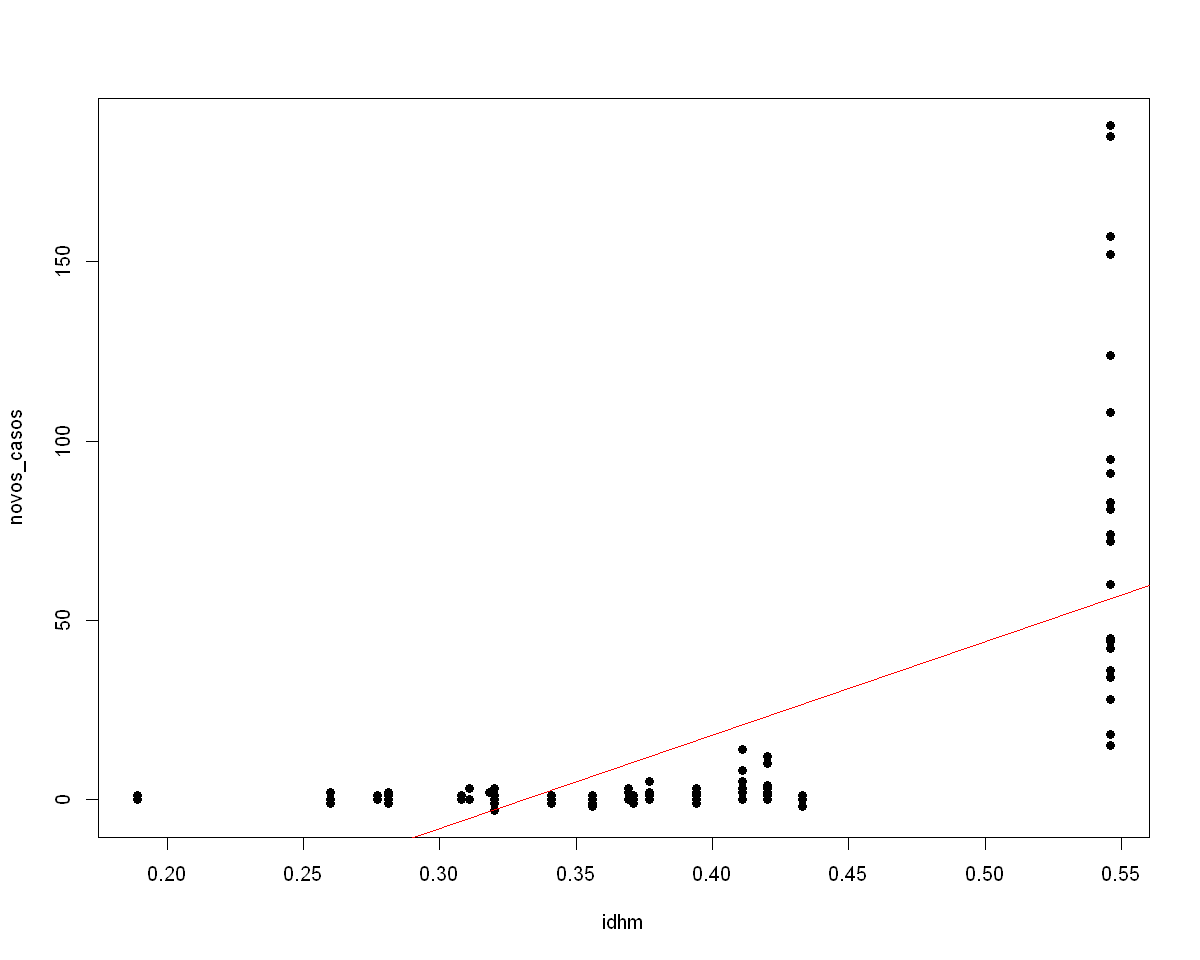

In [159]:
plot (novos_casos ~ idhm,pch=16 ,data = dados)
abline(modelo.regressao,col="red") # Esta função ajusta a reta do modelo aos dados

#### No gráfico acima, podemos observar que, quanto maior o idh da cidade, maior é a quantidade de casos confirmados.

In [160]:
corr <- round(cor(d[, c("new_confirmed", 
                        "IDHM")]), 1)

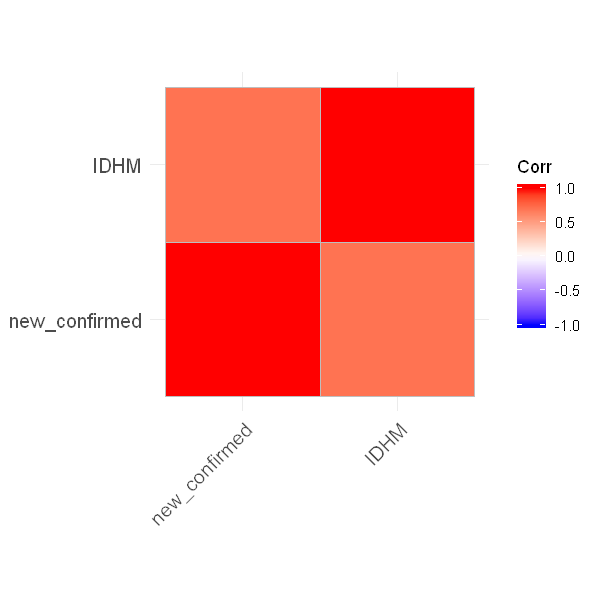

In [161]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggcorrplot(corr)

#### Na matriz de correlação acima, podemos observar que, idhm, tem uma forte correlação com o numero de casos confirmados de covid. 

In [162]:
df1 = df_caso_full[, c("date", "new_deaths")][df_caso_full$state == 'CE', ]
df2 = df_caso_full[, c("date", "new_confirmed")][df_caso_full$state == 'CE', ]


sum_acumulado_obitos <- setnames(aggregate(df1$new_deaths, 
                                      by=list(Category=df1$date), 
                                  FUN=sum), c("date", "obitos"))

sum_acumulado_novos_casos <- setnames(aggregate(df2$new_confirmed, 
                                      by=list(Category=df2$date), 
                                  FUN=sum), c("date","novos_casos"))


df_final = merge(sum_acumulado_novos_casos, sum_acumulado_obitos,  by = "date")
long <- reshape2::melt(df_final, id.vars = "date")

#renomeia colunas
long <- setnames(long, c("date", "legenda", "value"))


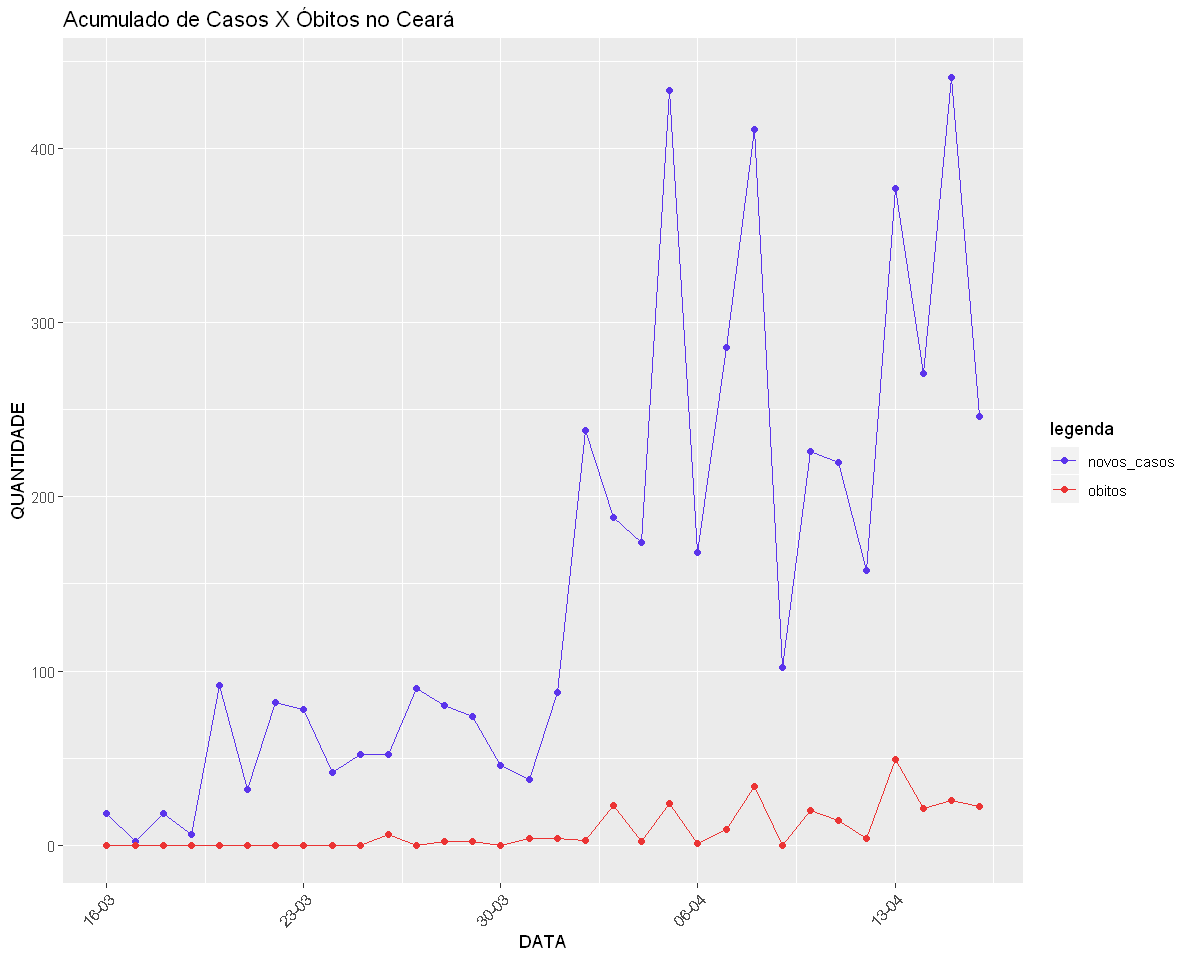

In [163]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot <- ggplot(long, aes(x =(date), y = value, 
                 group = legenda, colour = legenda)) +
  scale_color_manual(values=c("#5b34eb", "#eb3434")) +
  geom_line() +
  geom_point() +
  labs(title = "Acumulado de Casos X Óbitos no Ceará",
       x = "DATA", y = "QUANTIDADE")
                     
plot + scale_x_date(date_labels = "%d-%m") + theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [164]:
df_hist <- read.csv("HIST_PAINEL_COVIDBR_28fev2021.csv", header = TRUE, sep = ";")

In [165]:
df_hist <- df_hist[ (df_hist$estado == 'CE' & df_hist$casosNovos == 1), ]

In [166]:
df_hist[1, ]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior.metropolitana
314118,Nordeste,CE,,23,230000,NA,,2020-04-07,15,NA,12,1,0,0,NA,NA,NA


In [167]:
#Converte factor to date 
newDates <- as.Date(df_hist$data)
df_hist <- mutate(df_hist, data= newDates)
df_hist['mes_dia'] <- format(newDates, format = "%d-%m")


newDates <- as.Date(df_caso_full$date, format= "%d-%m-%Y")
df_caso_full['mes_dia'] <- format(newDates, format = "%d-%m")

In [168]:
df_hist[1, ]

regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior.metropolitana,mes_dia
Nordeste,CE,,23,230000,NA,,2020-04-07,15,NA,12,1,0,0,NA,NA,NA,07-04


In [169]:
df1 = df_caso_full[, c("mes_dia", "new_confirmed")]#[df_caso_full$state == 'CE', ]
df2 = df_hist[, c("mes_dia", "casosNovos")][df_hist$mes_dia %in% c(df_caso_full$mes_dia) & df_hist$data >= '2021-01-01',  ]



sum_novos_casos_2020 <- setnames(aggregate(df1$new_confirmed, 
                                      by=list(Category=df1$mes_dia), 
                                  FUN=sum), c("date", "2020"))

sum_novos_casos_2021 <- setnames(aggregate(df2$casosNovos, 
                                      by=list(Category=df2$mes_dia), 
                                  FUN=sum), c("date","2021"))


df_final = merge(sum_novos_casos_2020, sum_novos_casos_2021,  by = "date")
long <- reshape2::melt(df_final, id.vars = "date")

#renomeia colunas
long <- setnames(long, c("date", "legenda", "value"))

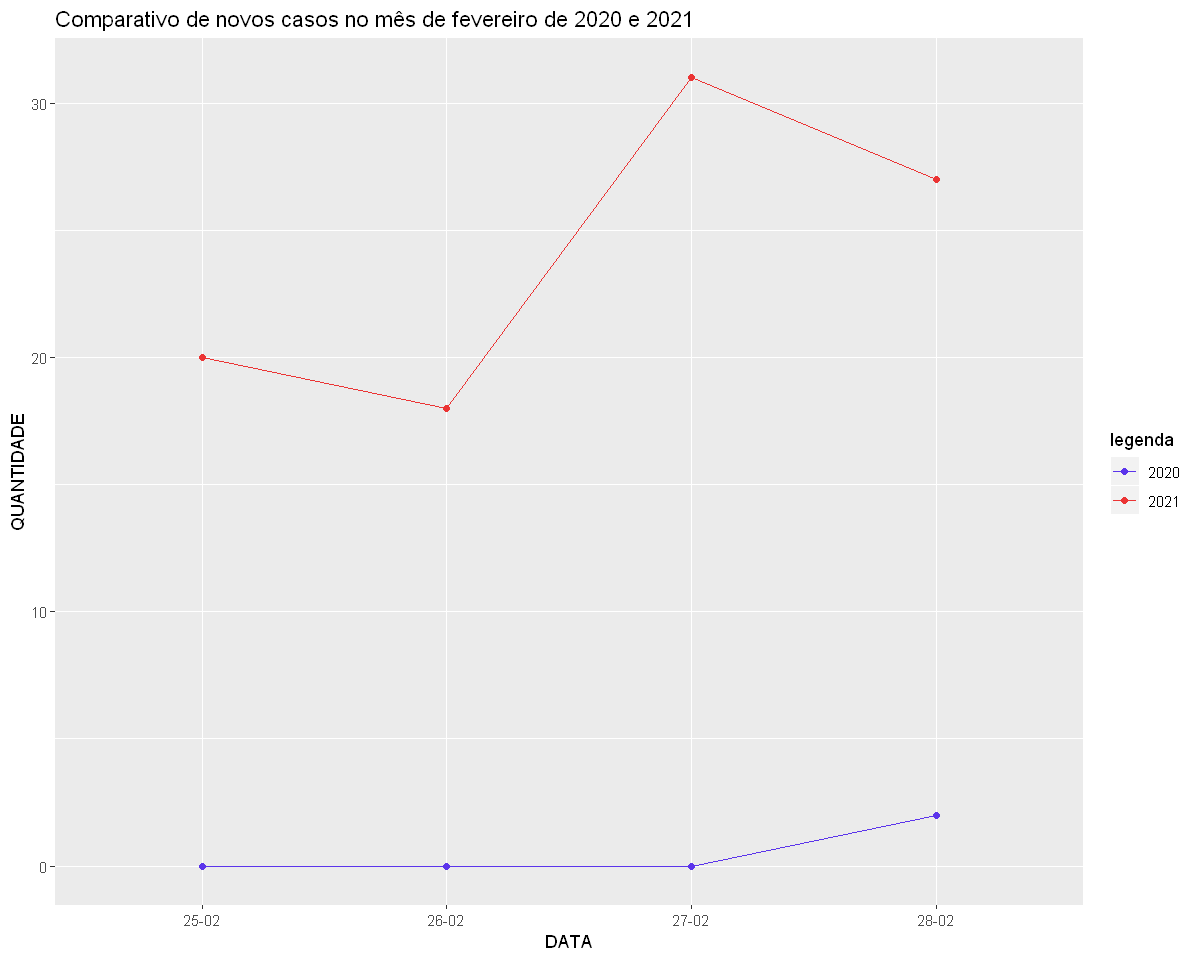

In [170]:
#options(repr.plot.width = 10, repr.plot.height = 8)
plot <- ggplot(long, aes(x =(date), y = value, 
                 group = legenda, colour = legenda)) +
  scale_color_manual(values=c("#5b34eb", "#eb3434")) +
  geom_line() +
  geom_point() +
  labs(title = "Comparativo de novos casos no mês de fevereiro de 2020 e 2021",
       x = "DATA", y = "QUANTIDADE")
                     
#plot + scale_x_date(date_labels = "%d-%m") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
plot